In [2]:
# imprort libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

In [3]:
# import dataset
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check the shape of the dataset
df.shape

(1338, 7)

In [5]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check the null values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# check the unique values in the dataset
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:

print("Region",df['region'].unique())
print("Smoker (Y/N)",df['smoker'].unique())
print("Gender",df['sex'].unique())

Region ['southwest' 'southeast' 'northwest' 'northeast']
Smoker (Y/N) ['yes' 'no']
Gender ['female' 'male']


In [15]:
# map values in the columns
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'female':1,'male':0})

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [17]:
# save the dataset
df.to_csv('insurance_preprocessed.csv',index=False)

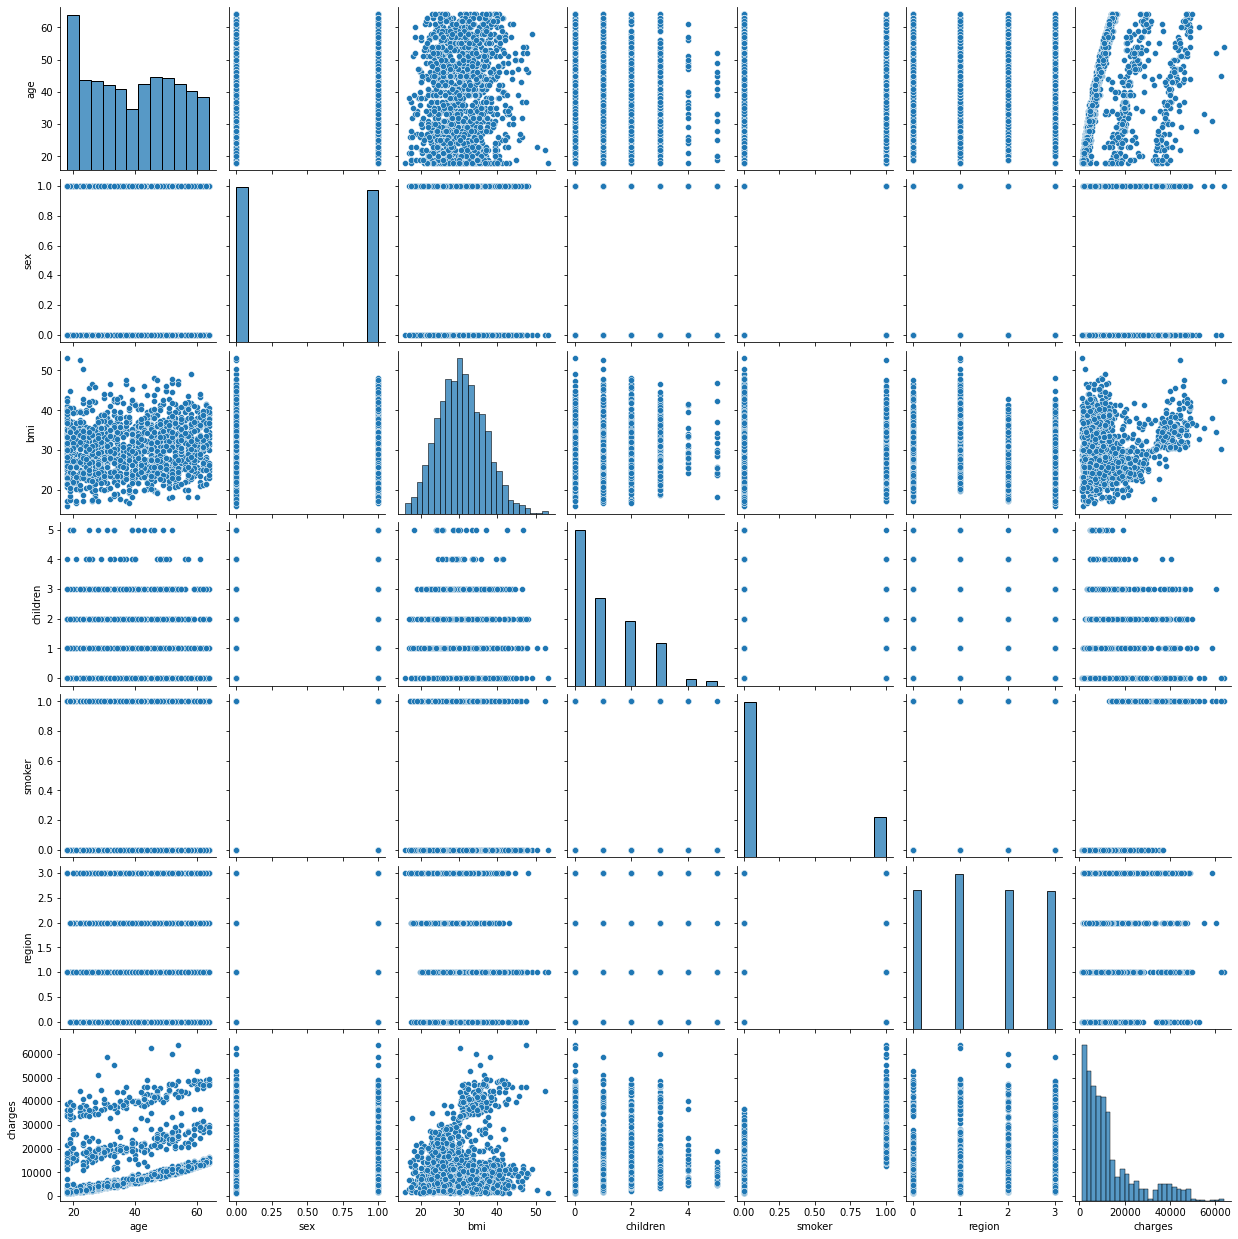

In [18]:
# visualizations
sns.pairplot(df)


<AxesSubplot:>

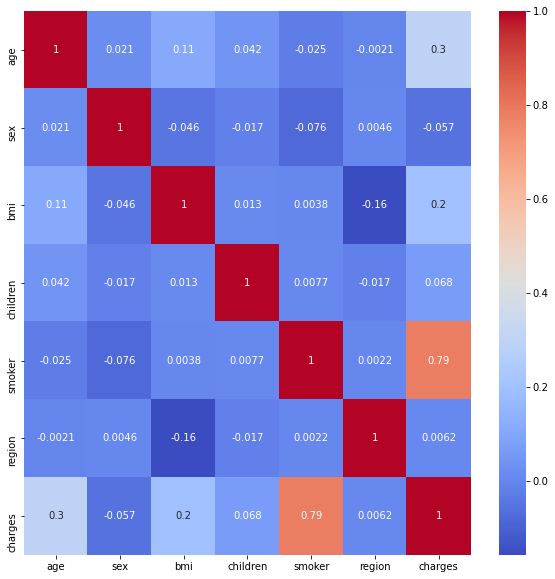

In [19]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

/Users/md/opt/anaconda3/envs/CDAC/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

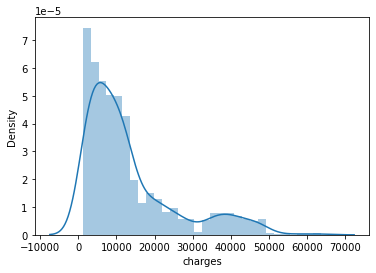

In [20]:
# distribution of the target variable
sns.distplot(df['charges'])


<AxesSubplot:xlabel='age', ylabel='charges'>

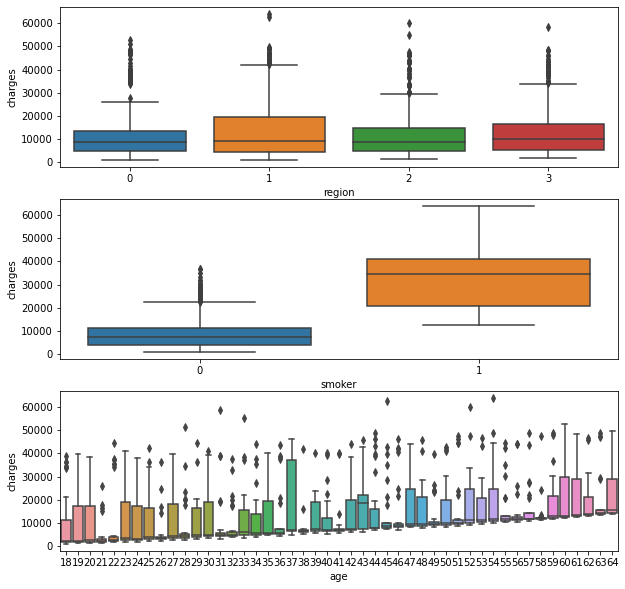

In [24]:
# distribution of the target variable with respect to the categorical variables
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.boxplot(x='region',y='charges',data=df)
plt.subplot(3,1,2)
sns.boxplot(x='smoker',y='charges',data=df)
plt.subplot(3,1,3)
sns.boxplot(x='age',y='charges',data=df)


<AxesSubplot:xlabel='age', ylabel='charges'>

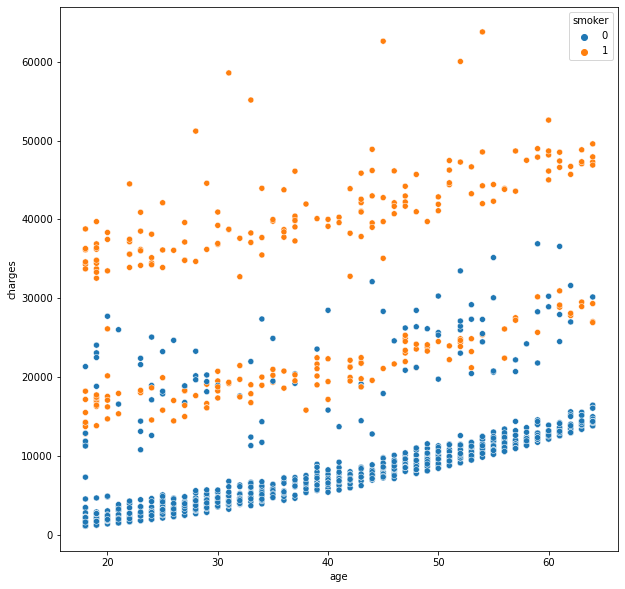

In [25]:
# age and charges distribution
plt.figure(figsize=(10,10))
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')


<AxesSubplot:xlabel='bmi', ylabel='charges'>

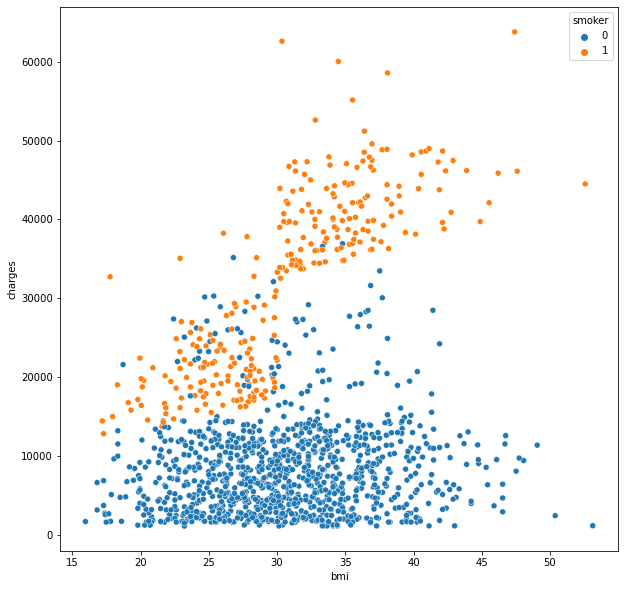

In [26]:
# bmi and charges distribution
plt.figure(figsize=(10,10))
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')